In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
train = pd.read_excel('DATA GAMA CUTE-MIPA.xlsx', sheet_name = 'modellingtraining', header=1)
test = pd.read_excel('DATA GAMA CUTE-MIPA.xlsx', sheet_name = 'testing', header=1)

In [7]:
train = train[['RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW', 'Diagnosis']]
train.head()

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,Diagnosis
0,3.78,9,"29,4",77.7,"23,8","30,7","21,1",BTT
1,5.94,"10,3",37.5,63.1,"17,4","27,5","15,9",BTT
2,5.93,"10,8",34.4,58.0,"18,2","31,3",16,BTT
3,5.29,11,37.6,71.0,20.7,29.2,16.9,BTT
4,5.79,11,37,63.9,19,29.7,16.6,BTT


In [8]:
test = test[['RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW', 'Diagnosis']]
test.head()

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW,Diagnosis
0,5.2,"9,8",31.4,60.4,"18,8",31.2,"16,8",BTT
1,5.26,10.9,36.4,69.2,20.8,30.1,15.5,BTT
2,5.55,"11,2",36.8,66.3,"20,2","30,5","16,5",BTT
3,6.61,"11,7",38.1,57.7,"17,7","30,7","16,9",BTT
4,4.92,"11,9",37.5,76.1,"24,1","31,7","16,9",BTT


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RBC        127 non-null    object 
 1   HGB        127 non-null    object 
 2   HCT        127 non-null    object 
 3   MCV        127 non-null    float64
 4   MCH        127 non-null    object 
 5   MCHC       127 non-null    object 
 6   RDW        127 non-null    object 
 7   Diagnosis  127 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.1+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RBC        63 non-null     object 
 1   HGB        63 non-null     object 
 2   HCT        63 non-null     float64
 3   MCV        63 non-null     float64
 4   MCH        63 non-null     object 
 5   MCHC       63 non-null     object 
 6   RDW        63 non-null     object 
 7   Diagnosis  63 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.1+ KB


In [11]:
def to_float(text):
    return float(str(text).replace(',', '.'))

columns_to_convert = ['RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW']

for column in columns_to_convert:
    train[column] = train[column].apply(to_float)

In [12]:
def to_float(text):
    return float(str(text).replace(',', '.'))

columns_to_convert = ['RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW']

for column in columns_to_convert:
    test[column] = test[column].apply(to_float)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RBC        63 non-null     float64
 1   HGB        63 non-null     float64
 2   HCT        63 non-null     float64
 3   MCV        63 non-null     float64
 4   MCH        63 non-null     float64
 5   MCHC       63 non-null     float64
 6   RDW        63 non-null     float64
 7   Diagnosis  63 non-null     object 
dtypes: float64(7), object(1)
memory usage: 4.1+ KB


In [34]:
train.describe()

,RBC,HGB,HCT,MCV,MCH,MCHC,RDW
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.00000,127.000000
mean,5.186142,11.719685,38.291339,74.077165,22.648031,30.54252,16.474016
std,0.573573,1.542315,3.965567,5.141539,2.198623,1.45665,1.624769
min,3.780000,9.000000,29.400000,58.000000,17.400000,26.50000,13.600000
25%,4.825000,10.650000,35.550000,70.850000,21.400000,29.55000,15.100000
50%,5.080000,11.600000,37.700000,75.000000,23.200000,30.70000,16.400000
75%,5.500000,12.700000,40.900000,77.850000,24.250000,31.60000,17.500000
max,6.940000,16.800000,48.700000,86.000000,27.900000,35.20000,21.200000


1. All attributes have quite large variants, with minimum and maximum values quite far apart. For the example, RBC ranges from 3.78 to 6.94 and HGB from 9 to 16.8 
2. The RDW (red cell distribution width) has a standard deviation of 1.62, with a mean 16.47. This indicates a large variation in red blood cell size between samples. A higher RDW could indicate conditions such as anemia or promblem condition with red blood cell. 
3. HGB (hemoglobin) has a mean value of 11.7, with standard deviation of 1.54, indicating some samples has hemoglobin value lower than the normal mean. (as the normal mean is usually around 12-16 g/dL in women).
4. The mean MCV (mean corpuscular volume) is 74.07 fl, which is below the normal range (80-100 fl). Usually a low MCV indicates microcytic anemia, such as thalassemia or iron deficiency.
5. The mean MCH (mean corpuscular hemoglobin) is 22.65 pg, whis is also slightly lower than the normal range (27-32 pg), indicating a tendency towards hypochromic anemia.

### Data Distribution Visualization (Histogram/KDE)

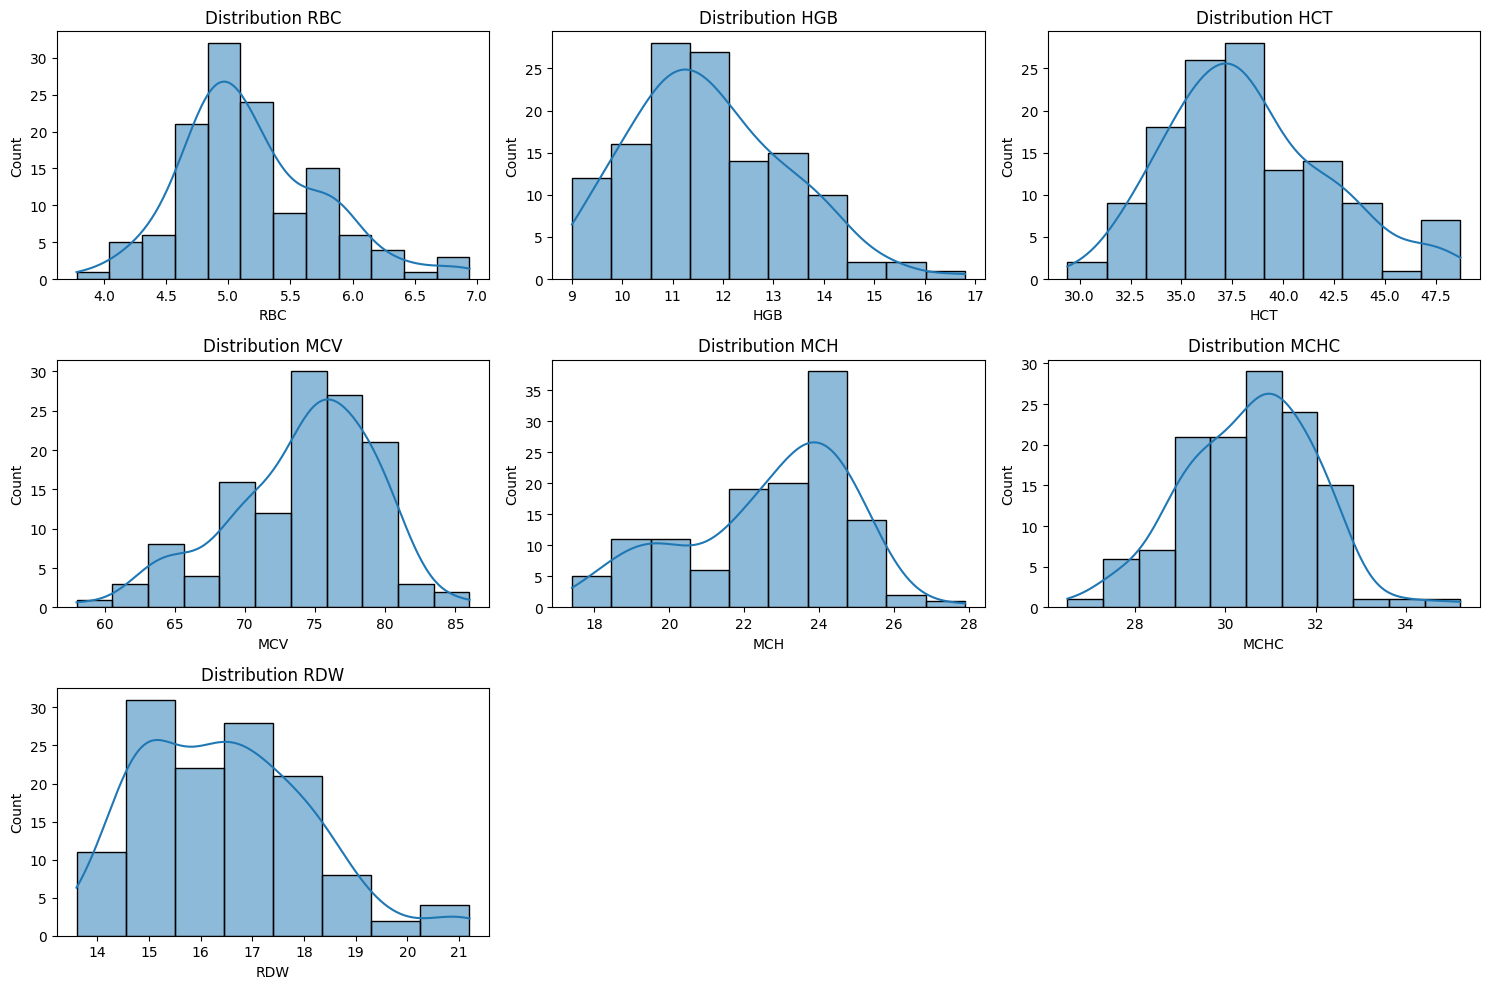

In [35]:
plt.figure(figsize=(15, 10))
features = ['RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDW']
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(train[feature], kde=True)
    plt.title(f'Distribution {feature}')
plt.tight_layout()
plt.show()

Some distributions such as RBC, HGB and HCT tend to be skewed to the right, indicating there are samples with lower than average values, possibly indicating anemia or higher blood cell variation.

### Boxplot for Outliers Detection

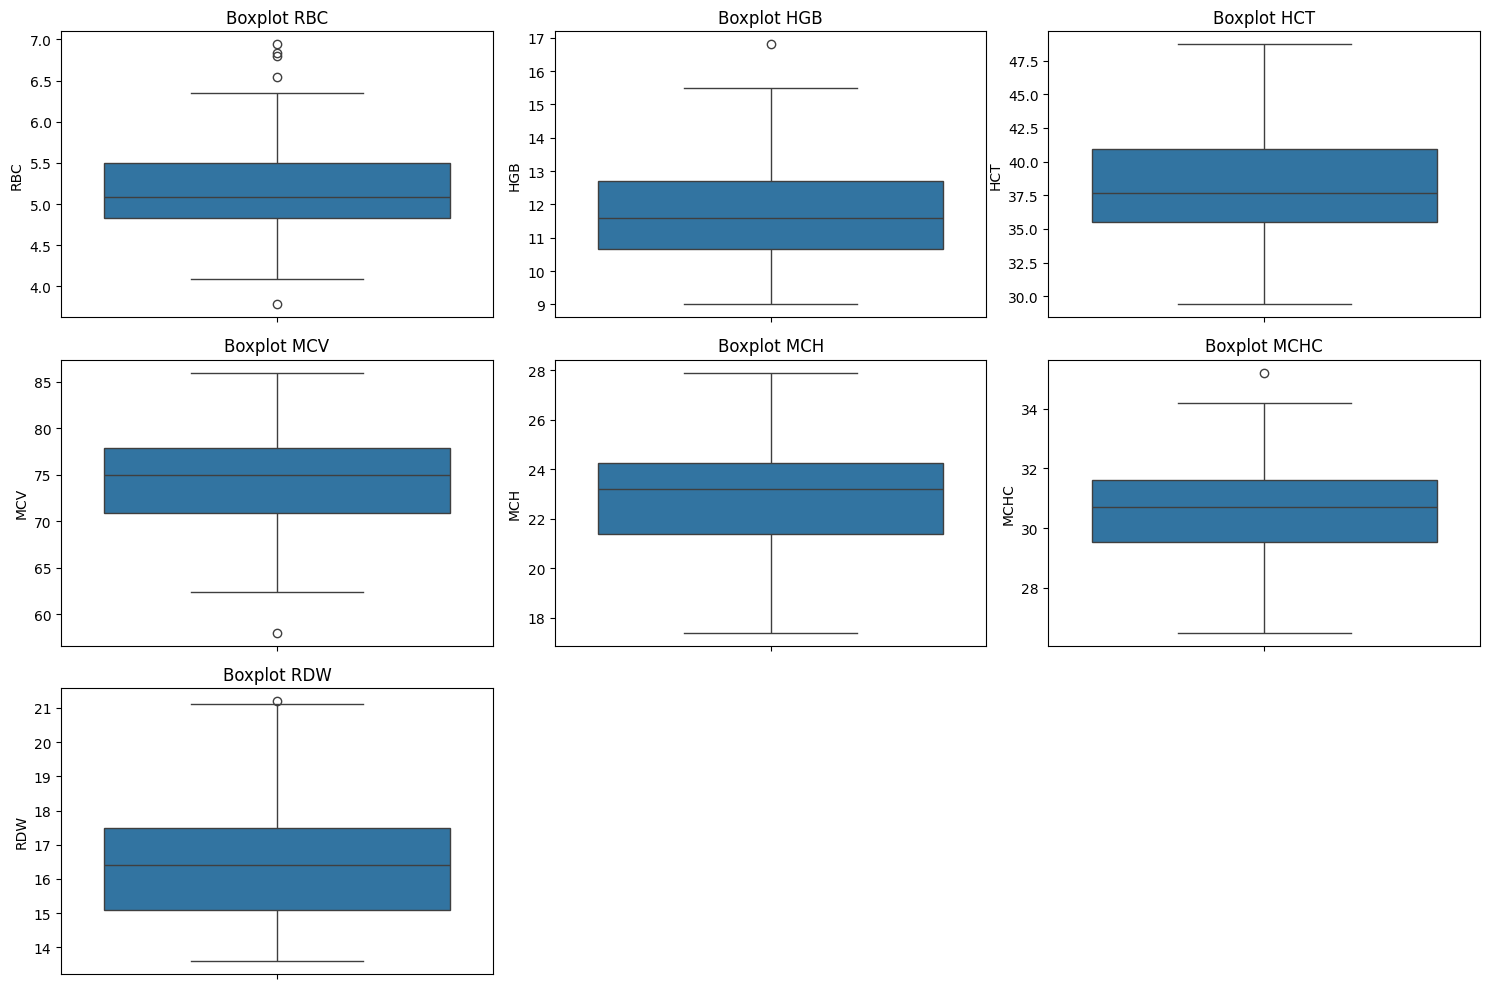

In [36]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=train[feature])
    plt.title(f'Boxplot {feature}')
plt.tight_layout()
plt.show()

### Pair Plot Between Features

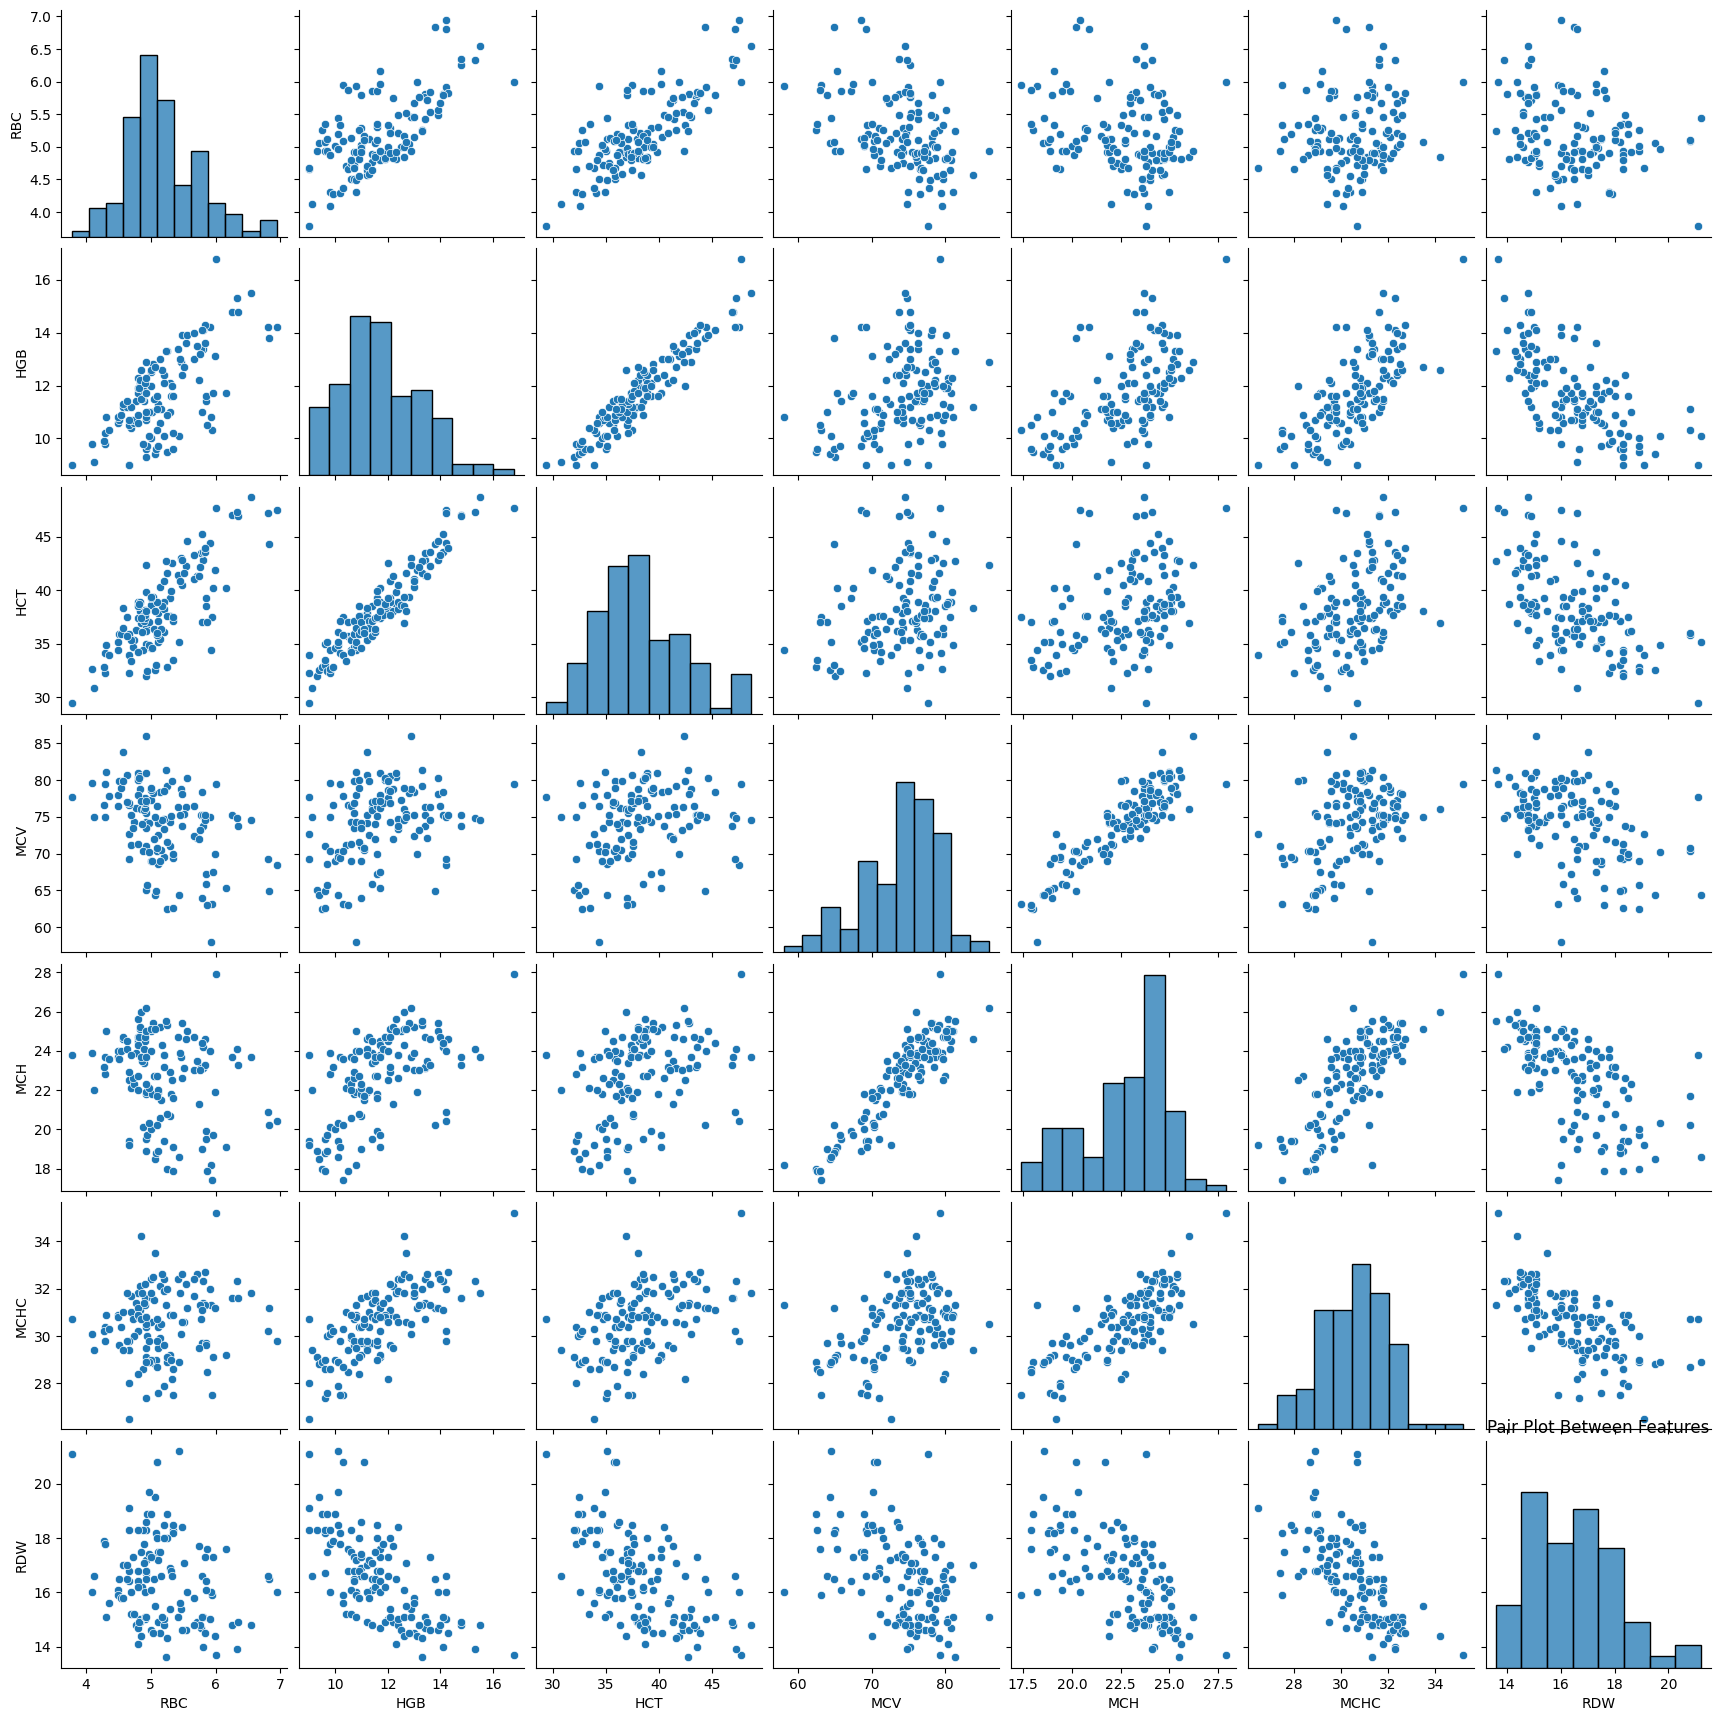

In [37]:
sns.pairplot(train[features])
plt.title('Pair Plot Between Features')
plt.show()

1. Blood parameters such as HGB, HCT, and MCV have a strong correlation with each other. This can be seen from the three parameters that are interrelated in describing the number and size of red blood cells.

### Boxplot Based on Diagnosis

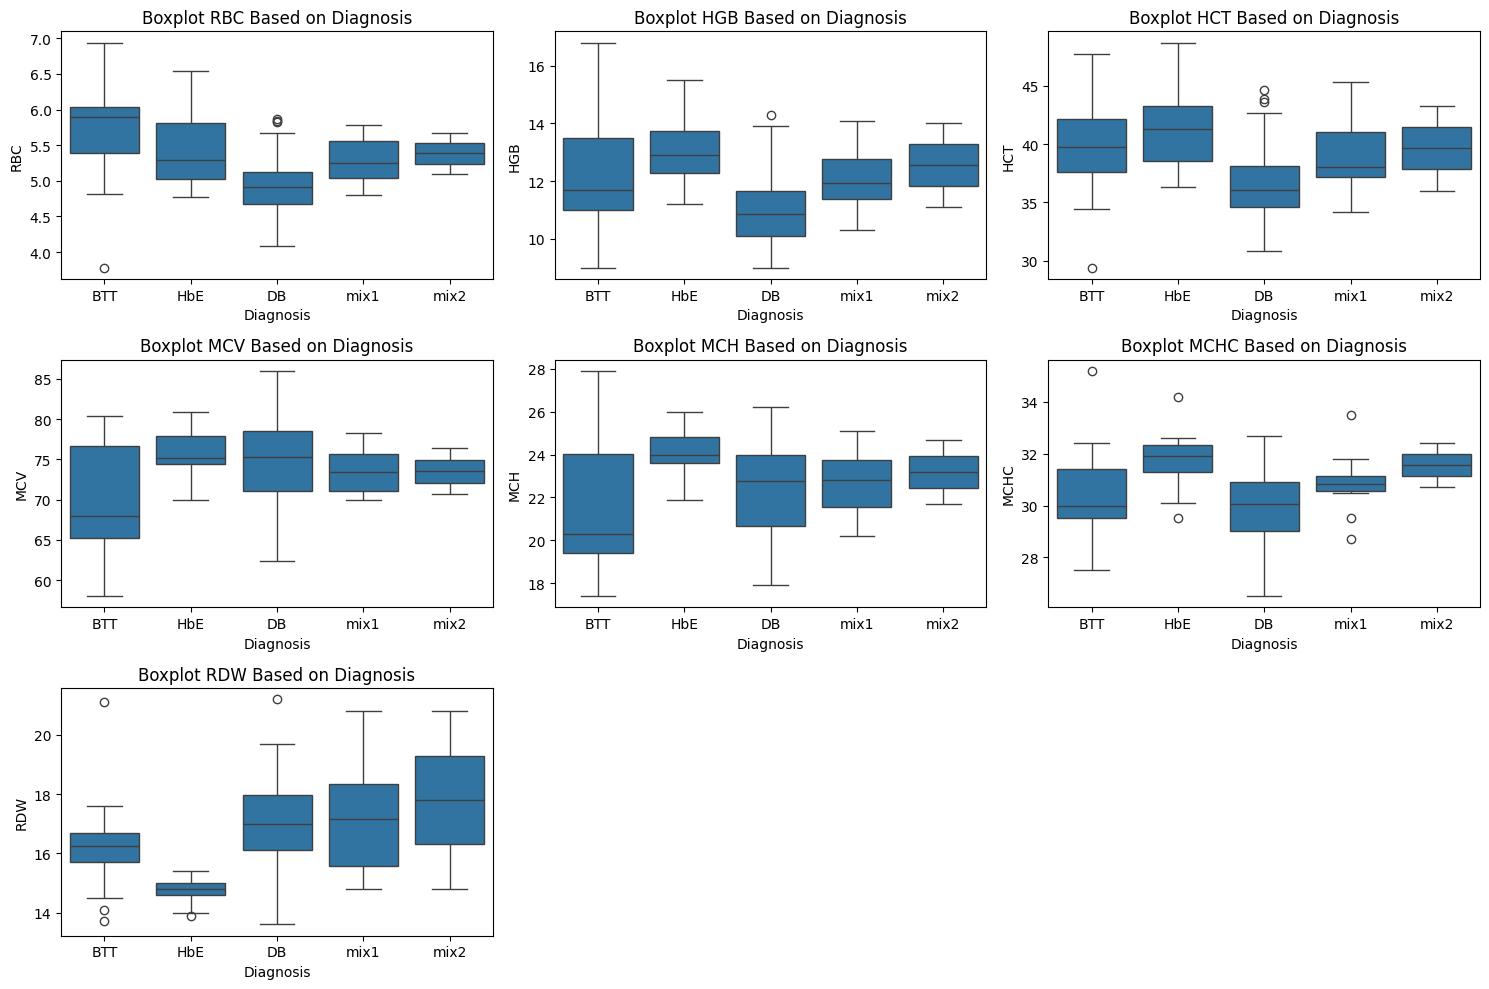

In [38]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=train['Diagnosis'], y=train[feature])
    plt.title(f'Boxplot {feature} Based on Diagnosis')
plt.tight_layout()
plt.show()

1. BTT shows greater variation in some values, such as red blood cell size (MCV) and hemoglobin level (HGB). This means that people with a diagnosis of BTT have greater differences in these values. There may be patients who have very low MCV and HGB values, while others have very high values.

2. HbE shows more consistent data, meaning that the values ​​do not differ much from one patient to another.

3. DB has outliers that are very different from most of the data, especially for hemoglobin (HGB) and hematocrit (HCT) levels, indicating that some patients in this group have more variable conditions.

4. Mix1 and Mix2: These two groups have similar data to each other and the differences are not as large as the BTT or DB groups.

### Visualization Comparison of Diagnosis

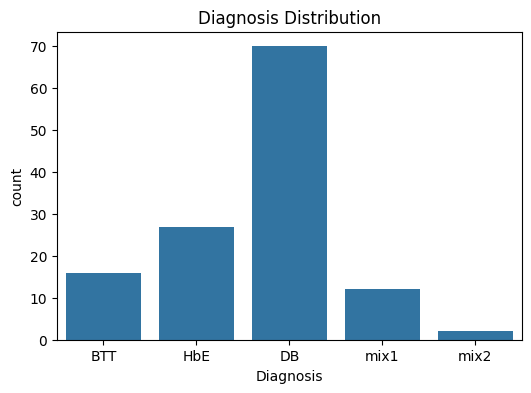

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=train)
plt.title('Diagnosis Distribution')
plt.show()

The graph above shows that the number of diagnoses of diabetes is greater when compared to BTT, HbE, DB, mix 1 and mix 2.

### Correlation Between Features (Heatmap)

C:\Users\M S I\AppData\Local\Temp\ipykernel_10860\1257373834.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='OrRd',linewidths=0.1)


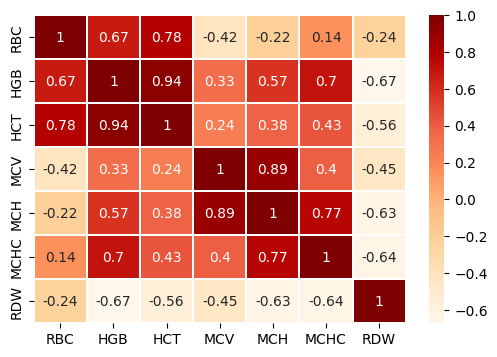

In [40]:
sns.heatmap(train.corr(), annot=True, cmap='OrRd',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(6,4)
plt.show()

For this prediction case, I only use 2 classes, namely BTT_HbE class 0 and DB class 1.

In [14]:
train = train[train['Diagnosis'] != 'mix1']
train = train[train['Diagnosis'] != 'mix2']

X = train.drop(['Diagnosis'], axis=1) # Drop the Diagnosis column
y = train['Diagnosis'] # Atake the Diagnosis column as a label
y.replace({"BTT": 0, "HbE": 0, "DB": 1, "BTT_HbE": 0}, inplace=True)


print(X)
print(y)

      RBC   HGB   HCT   MCV   MCH  MCHC   RDW
0    3.78   9.0  29.4  77.7  23.8  30.7  21.1
1    5.94  10.3  37.5  63.1  17.4  27.5  15.9
2    5.93  10.8  34.4  58.0  18.2  31.3  16.0
3    5.29  11.0  37.6  71.0  20.7  29.2  16.9
4    5.79  11.0  37.0  63.9  19.0  29.7  16.6
..    ...   ...   ...   ...   ...   ...   ...
108  5.67  13.0  41.0  72.4  23.0  31.7  15.8
109  5.24  13.3  42.7  81.4  25.5  31.3  13.6
110  5.84  13.6  43.6  74.6  23.3  31.3  17.3
111  5.56  13.9  44.6  80.2  25.0  31.2  16.0
112  5.83  14.3  43.9  75.3  24.6  32.7  14.5

[113 rows x 7 columns]
0      0
1      0
2      0
3      0
4      0
      ..
108    1
109    1
110    1
111    1
112    1
Name: Diagnosis, Length: 113, dtype: int64


In [15]:
test = test[test['Diagnosis'] != 'mix1']
test = test[test['Diagnosis'] != 'mix2']

X_t = test.drop(['Diagnosis'], axis=1) # Drop the Diagnosis column
y_t = test['Diagnosis'] # Atake the Diagnosis column as a label
y_t.replace({"BTT": 0, "HbE": 0, "DB": 1, "BTT_HbE": 0}, inplace=True)

print(X_t)
print(y_t)

     RBC   HGB   HCT   MCV   MCH  MCHC   RDW
0   5.20   9.8  31.4  60.4  18.8  31.2  16.8
1   5.26  10.9  36.4  69.2  20.8  30.1  15.5
2   5.55  11.2  36.8  66.3  20.2  30.5  16.5
3   6.61  11.7  38.1  57.7  17.7  30.7  16.9
4   4.92  11.9  37.5  76.1  24.1  31.7  16.9
5   5.92  13.0  42.3  71.4  21.9  30.6  16.8
6   6.74  14.0  46.3  68.8  20.8  30.2  16.3
7   5.96  15.0  48.5  81.4  25.1  30.8  14.3
8   4.76  11.3  35.2  74.0  23.8  32.2  14.3
9   4.95  11.9  37.9  76.7  24.0  31.3  15.1
10  5.11  12.1  37.7  73.7  23.6  32.1  14.9
11  5.25  12.3  39.1  74.6  23.5  31.5  14.8
12  5.15  12.4  40.0  77.7  24.1  31.0  15.6
13  5.05  12.6  39.2  77.5  24.9  32.1  15.0
14  4.96  12.9  40.1  81.0  26.1  32.3  18.6
15  5.28  13.2  42.2  79.9  24.9  31.2  15.1
16  5.60  13.4  42.5  75.9  23.9  31.5  14.9
17  5.84  13.6  43.8  74.9  23.3  31.1  15.3
18  6.07  14.0  44.6  73.4  23.0  31.4  16.2
19  6.22  14.7  44.4  71.3  23.7  33.2  14.9
20  6.58  14.9  47.9  72.7  22.6  31.1  14.9
21  6.69  

In [43]:
class_counts = y.value_counts()
class_counts1 = y_t.value_counts()

C:\Users\M S I\AppData\Local\Temp\ipykernel_10860\1764518288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


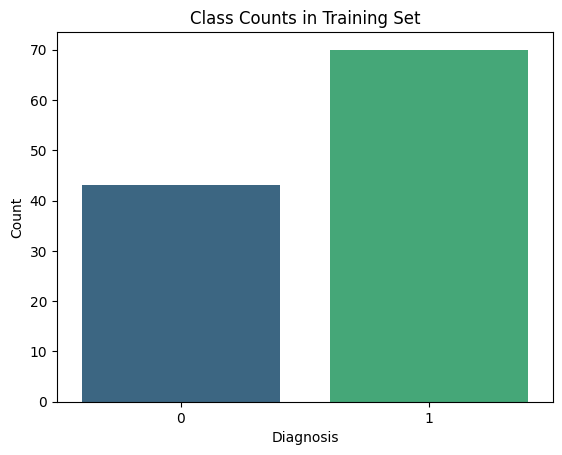

C:\Users\M S I\AppData\Local\Temp\ipykernel_10860\1764518288.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts1.index, y=class_counts1.values, palette='viridis')


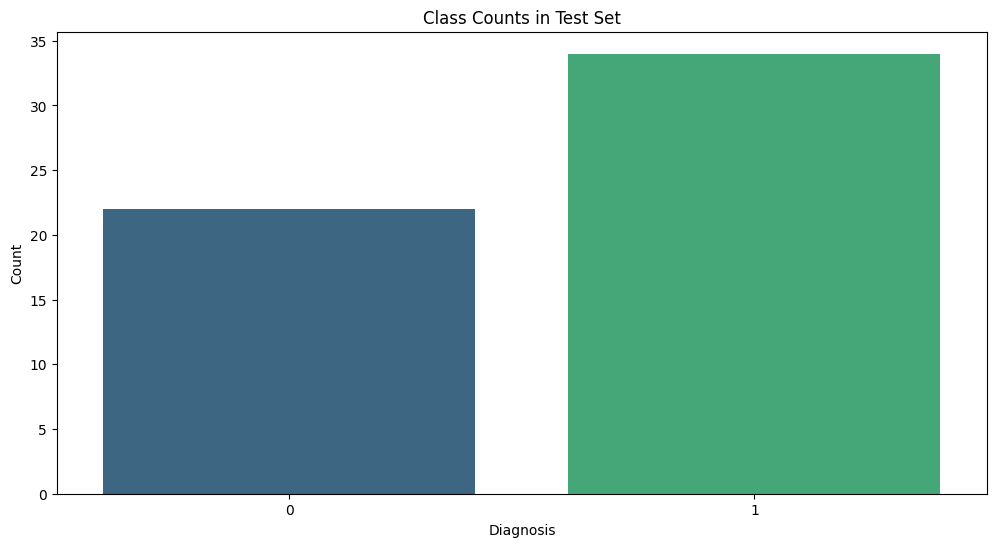

In [44]:
# Plotting class counts for the training setplt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Counts in Training Set')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Plotting class counts for the test set
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts1.index, y=class_counts1.values, palette='viridis')
plt.title('Class Counts in Test Set')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

## SVM
without tuning

In [45]:
stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
split = stk.split(X, y)

acc_list = []
recall_list = []
precision_list = []
f1_list = []
results_list = []
fold = 1

for i, item in enumerate(split):
    X_fold = X.copy().iloc[item[0]]
    y_fold = y.copy().iloc[item[0]]
    X_val_fold = X.copy().iloc[item[1]]
    y_val_fold = y.copy().iloc[item[1]]

    model = SVC(random_state=42)
    model.fit(X_fold, y_fold)

    y_pred_fold = model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
    rec = recall_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
    f1 = f1_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)

    print(f'Fold {fold}')
    print(f'Akurasi: {acc}, Presisi: {prec}, Recall: {rec}, F1-Score: {f1}')
    print()

    prec_per_class = prec.tolist()
    rec_per_class = rec.tolist()
    f1_per_class = f1.tolist()

    results_list.append({
        "Fold": fold,
        "Accuracy_Mean": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1,
    })

    fold += 1
    
    acc_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)
    
acc_mean = np.mean(acc_list)
precision_mean = np.mean(precision_list)
recall_mean = np.mean(recall_list)
f1_mean = np.mean(f1_list)

print("Accuracy Mean:", acc_mean)
print("Precision Mean:", precision_mean)
print("Recall Mean:", recall_mean)
print("F1-Score Mean:", f1_mean)

Fold 1
Akurasi: 0.6521739130434783, Presisi: 0.8181818181818181, Recall: 0.5555555555555556, F1-Score: 0.4888888888888889

Fold 2
Akurasi: 0.6086956521739131, Presisi: 0.30434782608695654, Recall: 0.5, F1-Score: 0.3783783783783784

Fold 3
Akurasi: 0.6086956521739131, Presisi: 0.30434782608695654, Recall: 0.5, F1-Score: 0.3783783783783784

Fold 4
Akurasi: 0.6363636363636364, Presisi: 0.3181818181818182, Recall: 0.5, F1-Score: 0.3888888888888889

Fold 5
Akurasi: 0.6818181818181818, Presisi: 0.8333333333333333, Recall: 0.5625, F1-Score: 0.5111111111111111

Accuracy Mean: 0.6375494071146245
Precision Mean: 0.5156785243741766
Recall Mean: 0.523611111111111
F1-Score Mean: 0.4291291291291291


In [46]:
model =SVC(random_state=42)
model.fit(X,y)

y_pred_fold = model.predict(X_t)
print(classification_report(y_t, y_pred_fold))
acc = accuracy_score(y_t, y_pred_fold)
prec = precision_score(y_t, y_pred_fold, average='macro')
rec = recall_score(y_t, y_pred_fold, average='macro')
f1 = f1_score(y_t, y_pred_fold, average='macro')

print("akurasi: {:.2f}%".format(acc*100))
print("presisi: {:.2f}%".format(prec*100))
print("recall: {:.2f}%".format(rec*100))
print("f1_score: {:.2f}%".format(f1*100))

              precision    recall  f1-score   support

           0       1.00      0.23      0.37        22
           1       0.67      1.00      0.80        34

    accuracy                           0.70        56
   macro avg       0.83      0.61      0.59        56
weighted avg       0.80      0.70      0.63        56

akurasi: 69.64%
presisi: 83.33%
recall: 61.36%
f1_score: 58.52%


### Hyperparameter Tuning SVM - Optuna

In [50]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    C = trial.suggest_loguniform('C', 0.1, 10.0)

    stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    split = stk.split(X, y)

    acc_list = []

    for i, item in enumerate(split):
        X_fold = X.copy().iloc[item[0]]
        y_fold = y.copy()[item[0]]
        X_val_fold = X.copy().iloc[item[1]]
        y_val_fold = y.copy()[item[1]]

        model = SVC(random_state=42, kernel=kernel, C=C)
        model.fit(X_fold, y_fold)

        y_pred_fold = model.predict(X_val_fold)

        acc = accuracy_score(y_val_fold, y_pred_fold)
        acc_list.append(acc)

    acc_mean = np.mean(acc_list)
    return acc_mean

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train and evaluate the model with the best hyperparameters
best_kernel = best_params['kernel']
best_C = best_params['C']
best_result = train_val_SVM(best_kernel, best_C)
print(f'Best Model - kernel: {best_kernel}, C: {best_C}, Accuracy Mean: {best_result["acc_mean"]:.4f}, Precision Mean: {best_result["prec_mean"]:.4f}, Recall Mean: {best_result["recall_mean"]:.4f}, F1-Score Mean: {best_result["f1_mean"]:.4f}')

[I 2024-09-12 21:18:02,681] A new study created in memory with name: no-name-32f4202c-3990-4c60-8e0a-54284e64d5ef
C:\Users\M S I\AppData\Local\Temp\ipykernel_10860\4275409384.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 10.0)
[I 2024-09-12 21:18:02,730] Trial 0 finished with value: 0.8853754940711462 and parameters: {'kernel': 'linear', 'C': 0.6404453149108442}. Best is trial 0 with value: 0.8853754940711462.
C:\Users\M S I\AppData\Local\Temp\ipykernel_10860\4275409384.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 10.0)
[I 2024-09-12 21:18:02,761] Trial 1 finished with value: 0.90

Best Hyperparameters: {'kernel': 'linear', 'C': 9.954645907636461}
Best Model - kernel: linear, C: 9.954645907636461, Accuracy Mean: 0.9115, Precision Mean: 0.9086, Recall Mean: 0.9139, F1-Score Mean: 0.9069


In [51]:
best_model = SVC(random_state=42, kernel=best_kernel, C=best_C)
best_model.fit(X, y)

# Make predictions on the test set
y_pred_test = best_model.predict(X_t)

# Print the classification report
print("Classification Report for the Best Model on the Test Set:")
print(classification_report(y_t, y_pred_test))
acc = accuracy_score(y_t, y_pred_test)
prec = precision_score(y_t, y_pred_test, average='macro')
rec = recall_score(y_t, y_pred_test, average='macro')
f1 = f1_score(y_t, y_pred_test, average='macro')

print("Accuracy: {:.2f}%".format(acc * 100))
print("Precision: {:.2f}%".format(prec * 100))
print("Recall: {:.2f}%".format(rec * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Classification Report for the Best Model on the Test Set:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.91      0.91      0.91        34

    accuracy                           0.89        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.89      0.89      0.89        56

Accuracy: 89.29%
Precision: 88.77%
Recall: 88.77%
F1 Score: 88.77%


## Naive Bayes - (NB)

without tuning

In [52]:
stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
split = stk.split(X, y)

acc_list = []
recall_list = []
precision_list = []
f1_list = []
results_list = []
fold = 1

for i, item in enumerate(split):
    X_fold = X.copy().iloc[item[0]]
    y_fold = y.copy().iloc[item[0]]
    X_val_fold = X.copy().iloc[item[1]]
    y_val_fold = y.copy().iloc[item[1]]

    model = GaussianNB()
    model.fit(X_fold, y_fold)

    y_pred_fold = model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
    rec = recall_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
    f1 = f1_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)

    print(f'Fold {fold}')
    print(f'Akurasi: {acc}, Presisi: {prec}, Recall: {rec}, F1-Score: {f1}')
    print()

    prec_per_class = prec.tolist()
    rec_per_class = rec.tolist()
    f1_per_class = f1.tolist()

    results_list.append({
        "Fold": fold,
        "Accuracy_Mean": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1,
    })

    fold += 1
    
    acc_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)
    
acc_mean = np.mean(acc_list)
precision_mean = np.mean(precision_list)
recall_mean = np.mean(recall_list)
f1_mean = np.mean(f1_list)

print("Accuracy Mean:", acc_mean)
print("Precision Mean:", precision_mean)
print("Recall Mean:", recall_mean)
print("F1-Score Mean:", f1_mean)

Fold 1
Akurasi: 0.782608695652174, Presisi: 0.8214285714285714, Recall: 0.8214285714285714, F1-Score: 0.782608695652174

Fold 2
Akurasi: 0.8260869565217391, Presisi: 0.8174603174603174, Recall: 0.8174603174603174, F1-Score: 0.8174603174603174

Fold 3
Akurasi: 0.9130434782608695, Presisi: 0.9375, Recall: 0.8888888888888888, F1-Score: 0.9041666666666668

Fold 4
Akurasi: 0.8636363636363636, Presisi: 0.861904761904762, Recall: 0.8392857142857143, F1-Score: 0.8482758620689654

Fold 5
Akurasi: 0.8181818181818182, Presisi: 0.8229166666666667, Recall: 0.7767857142857143, F1-Score: 0.7904761904761904

Accuracy Mean: 0.8407114624505929
Precision Mean: 0.8522420634920636
Recall Mean: 0.8287698412698413
F1-Score Mean: 0.8285975464648627


In [53]:
model =GaussianNB()
model.fit(X,y)

y_pred_fold = model.predict(X_t)
print(classification_report(y_t, y_pred_fold))
acc = accuracy_score(y_t, y_pred_fold)
prec = precision_score(y_t, y_pred_fold, average='macro')
rec = recall_score(y_t, y_pred_fold, average='macro')
f1 = f1_score(y_t, y_pred_fold, average='macro')

print("akurasi: {:.2f}%".format(acc*100))
print("presisi: {:.2f}%".format(prec*100))
print("recall: {:.2f}%".format(rec*100))
print("f1_score: {:.2f}%".format(f1*100))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.82      0.91      0.86        34

    accuracy                           0.82        56
   macro avg       0.82      0.80      0.81        56
weighted avg       0.82      0.82      0.82        56

akurasi: 82.14%
presisi: 82.46%
recall: 79.68%
f1_score: 80.56%


### Hyperparameter Tuning NB - Optuna

In [59]:
def train_val_NB(var_smoothing, X, y):
    stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    split = stk.split(X, y)

    acc_list = []
    for i, item in enumerate(split):
        X_fold = X.copy().iloc[item[0]]
        y_fold = y.copy().iloc[item[0]]
        X_val_fold = X.copy().iloc[item[1]]
        y_val_fold = y.copy().iloc[item[1]]

        model = GaussianNB(var_smoothing=var_smoothing)
        model.fit(X_fold, y_fold)

        y_pred_fold = model.predict(X_val_fold)

        acc = accuracy_score(y_val_fold, y_pred_fold)
        acc_list.append(acc)

    acc_mean = np.mean(acc_list)
    return {"acc_mean": acc_mean}

# Define the objective function for Optuna
def objective(trial):
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-5)

    result = train_val_NB(var_smoothing, X, y)
    return result['acc_mean']

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train and evaluate the model with the best hyperparameters
best_var = best_params['var_smoothing']
best_result = train_val_NB(best_var, X, y)
print(f'Best Model - var_smoothing: {best_var}, Accuracy Mean: {best_result["acc_mean"]:.4f}')

[I 2024-09-12 21:24:55,247] A new study created in memory with name: no-name-b9e9f58e-5530-4d45-a622-8b452fb52deb
C:\Users\M S I\AppData\Local\Temp\ipykernel_10860\1898963475.py:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-5)
[I 2024-09-12 21:24:55,268] Trial 0 finished with value: 0.8407114624505929 and parameters: {'var_smoothing': 1.0670761698465114e-06}. Best is trial 0 with value: 0.8407114624505929.
C:\Users\M S I\AppData\Local\Temp\ipykernel_10860\1898963475.py:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-5)
[I 2024-09-

Best Hyperparameters: {'var_smoothing': 1.0670761698465114e-06}
Best Model - var_smoothing: 1.0670761698465114e-06, Accuracy Mean: 0.8407


In [60]:
best_model = GaussianNB(var_smoothing=best_var)
best_model.fit(X, y)

# Make predictions on the test set
y_pred_test = best_model.predict(X_t)

# Print the classification report
print("Classification Report for the Best Model on the Test Set:")
print(classification_report(y_t, y_pred_test))
acc = accuracy_score(y_t, y_pred_test)
prec = precision_score(y_t, y_pred_test, average='macro')
rec = recall_score(y_t, y_pred_test, average='macro')
f1 = f1_score(y_t, y_pred_test, average='macro')

print("Accuracy: {:.2f}%".format(acc * 100))
print("Precision: {:.2f}%".format(prec * 100))
print("Recall: {:.2f}%".format(rec * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Classification Report for the Best Model on the Test Set:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.82      0.91      0.86        34

    accuracy                           0.82        56
   macro avg       0.82      0.80      0.81        56
weighted avg       0.82      0.82      0.82        56

Accuracy: 82.14%
Precision: 82.46%
Recall: 79.68%
F1 Score: 80.56%


## Random Forest - (RF)

without tuning

In [61]:
stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
split = stk.split(X, y)

acc_list = []
recall_list = []
precision_list = []
f1_list = []
results_list = []
fold = 1

for i, item in enumerate(split):
    X_fold = X.copy().iloc[item[0]]
    y_fold = y.copy().iloc[item[0]]
    X_val_fold = X.copy().iloc[item[1]]
    y_val_fold = y.copy().iloc[item[1]]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_fold, y_fold)

    y_pred_fold = model.predict(X_val_fold)

    acc = accuracy_score(y_val_fold, y_pred_fold)
    prec = precision_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
    rec = recall_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
    f1 = f1_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)

    print(f'Fold {fold}')
    print(f'Akurasi: {acc}, Presisi: {prec}, Recall: {rec}, F1-Score: {f1}')
    print()

    prec_per_class = prec.tolist()
    rec_per_class = rec.tolist()
    f1_per_class = f1.tolist()

    results_list.append({
        "Fold": fold,
        "Accuracy_Mean": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1,
    })

    fold += 1
    
    acc_list.append(acc)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)
    
acc_mean = np.mean(acc_list)
precision_mean = np.mean(precision_list)
recall_mean = np.mean(recall_list)
f1_mean = np.mean(f1_list)

print("Accuracy Mean:", acc_mean)
print("Precision Mean:", precision_mean)
print("Recall Mean:", recall_mean)
print("F1-Score Mean:", f1_mean)

Fold 1
Akurasi: 0.782608695652174, Presisi: 0.8214285714285714, Recall: 0.8214285714285714, F1-Score: 0.782608695652174

Fold 2
Akurasi: 0.8695652173913043, Presisi: 0.9117647058823529, Recall: 0.8333333333333333, F1-Score: 0.8516129032258064

Fold 3
Akurasi: 0.9130434782608695, Presisi: 0.9087301587301587, Recall: 0.9087301587301587, F1-Score: 0.9087301587301587

Fold 4
Akurasi: 0.9545454545454546, Presisi: 0.9444444444444444, Recall: 0.9642857142857143, F1-Score: 0.9520697167755992

Fold 5
Akurasi: 0.8636363636363636, Presisi: 0.861904761904762, Recall: 0.8392857142857143, F1-Score: 0.8482758620689654

Accuracy Mean: 0.8766798418972332
Precision Mean: 0.8896545284780579
Recall Mean: 0.8734126984126984
F1-Score Mean: 0.8686594672905408


In [62]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

y_pred_fold = model.predict(X_t)
print(classification_report(y_t, y_pred_fold))
acc = accuracy_score(y_t, y_pred_fold)
prec = precision_score(y_t, y_pred_fold, average='macro')
rec = recall_score(y_t, y_pred_fold, average='macro')
f1 = f1_score(y_t, y_pred_fold, average='macro')

print("Accuracy: {:.2f}%".format(acc * 100))
print("Precision: {:.2f}%".format(prec * 100))
print("Recall: {:.2f}%".format(rec * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.82      0.94      0.88        34

    accuracy                           0.84        56
   macro avg       0.85      0.81      0.82        56
weighted avg       0.84      0.84      0.83        56

Accuracy: 83.93%
Precision: 85.14%
Recall: 81.15%
F1 Score: 82.30%


### Hyperparameter Tuning RF - OPTUNA

In [66]:
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the function to train and validate the RandomForest model
def train_val_RF(n_estimators, max_depth):
    stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    split = stk.split(X, y)

    acc_list = []

    for i, item in enumerate(split):
        X_fold = X.iloc[item[0]]
        y_fold = y.iloc[item[0]]
        X_val_fold = X.iloc[item[1]]
        y_val_fold = y.iloc[item[1]]

        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_fold, y_fold)

        y_pred_fold = model.predict(X_val_fold)

        acc = accuracy_score(y_val_fold, y_pred_fold)
        acc_list.append(acc)

    acc_mean = np.mean(acc_list)
    return {"acc_mean": acc_mean}

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)

    # Train and validate with the suggested hyperparameters
    result = train_val_RF(n_estimators, max_depth)
    return result['acc_mean']

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train and evaluate the model with the best hyperparameters
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_result = train_val_RF(best_n_estimators, best_max_depth)

print(f'Best Model - n_estimators: {best_n_estimators}, max_depth: {best_max_depth}, Accuracy Mean: {best_result["acc_mean"]:.4f}')

[I 2024-09-12 21:27:21,518] A new study created in memory with name: no-name-f22b0a0c-2ee8-4d37-9257-6bac081aac10
[I 2024-09-12 21:27:21,971] Trial 0 finished with value: 0.867588932806324 and parameters: {'n_estimators': 97, 'max_depth': 16}. Best is trial 0 with value: 0.867588932806324.
[I 2024-09-12 21:27:22,707] Trial 1 finished with value: 0.8679841897233201 and parameters: {'n_estimators': 160, 'max_depth': 8}. Best is trial 1 with value: 0.8679841897233201.
[I 2024-09-12 21:27:23,456] Trial 2 finished with value: 0.8679841897233201 and parameters: {'n_estimators': 170, 'max_depth': 12}. Best is trial 1 with value: 0.8679841897233201.
[I 2024-09-12 21:27:23,925] Trial 3 finished with value: 0.867588932806324 and parameters: {'n_estimators': 107, 'max_depth': 16}. Best is trial 1 with value: 0.8679841897233201.
[I 2024-09-12 21:27:24,241] Trial 4 finished with value: 0.8584980237154151 and parameters: {'n_estimators': 70, 'max_depth': 19}. Best is trial 1 with value: 0.8679841897

Best Hyperparameters: {'n_estimators': 128, 'max_depth': 13}
Best Model - n_estimators: 128, max_depth: 13, Accuracy Mean: 0.8854


In [67]:
best_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)
best_model.fit(X, y)

# Make predictions on the test set
y_pred_test = best_model.predict(X_t)

# Print the classification report
print("Classification Report for the Best Model on the Test Set:")
print(classification_report(y_t, y_pred_test))

# Calculate and print additional metrics
acc = accuracy_score(y_t, y_pred_test)
prec = precision_score(y_t, y_pred_test, average='macro')
rec = recall_score(y_t, y_pred_test, average='macro')
f1 = f1_score(y_t, y_pred_test, average='macro')

print("Accuracy: {:.2f}%".format(acc * 100))
print("Precision: {:.2f}%".format(prec * 100))
print("Recall: {:.2f}%".format(rec * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Classification Report for the Best Model on the Test Set:
              precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.82      0.94      0.88        34

    accuracy                           0.84        56
   macro avg       0.85      0.81      0.82        56
weighted avg       0.84      0.84      0.83        56

Accuracy: 83.93%
Precision: 85.14%
Recall: 81.15%
F1 Score: 82.30%


## Stacking

In [68]:
estimators = [
    ("svm", SVC(random_state=42, kernel=best_kernel, C=best_C)),
    ("nb", GaussianNB(var_smoothing=best_var)),
    ("rf", RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth))
]

In [69]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    C = trial.suggest_loguniform('C', 1e-2, 1e2)

    acc_list = []
    recall_list = []
    precision_list = []
    F1_Score = []

    model_stack = StackingClassifier(
        estimators=estimators,
        final_estimator=SVC(random_state=42, kernel=kernel, C=C),
        stack_method='predict'
    )

    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[test_index]

        model_stack.fit(X_train_fold, y_train_fold)
        y_pred = model_stack.predict(X_val_fold)

        acc = accuracy_score(y_val_fold, y_pred)
        prec = precision_score(y_val_fold, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_val_fold, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_val_fold, y_pred, average='macro', zero_division=0)

        acc_list.append(acc)
        precision_list.append(prec)
        recall_list.append(rec)
        F1_Score.append(f1)

    acc_mean = np.mean(acc_list)
    prec_mean = np.mean(precision_list)
    recall_mean = np.mean(recall_list)
    f1_mean = np.mean(F1_Score)

    return acc_mean

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train and evaluate the model with the best hyperparameters
best_kernel = best_params['kernel']
best_C = best_params['C']

best_model_stack = StackingClassifier(
    estimators=estimators,
    final_estimator=SVC(random_state=42, kernel=best_kernel, C=best_C),
    stack_method='predict'
)
best_model_stack.fit(X, y)

y_pred_val = best_model_stack.predict(X_val_fold)
acc_val = accuracy_score(y_val_fold, y_pred_val)
prec_val = precision_score(y_val_fold, y_pred_val, average='macro')
rec_val = recall_score(y_val_fold, y_pred_val, average='macro')
f1_val = f1_score(y_val_fold, y_pred_val, average='macro')

print("Validation Metrics for Best Model:")
print("Accuracy: {:.4f}".format(acc_val))
print("Precision: {:.4f}".format(prec_val))
print("Recall: {:.4f}".format(rec_val))
print("F1-Score: {:.4f}".format(f1_val))

[I 2024-09-12 21:28:28,172] A new study created in memory with name: no-name-29adf570-8179-4773-ae12-2698dc42ced4
C:\Users\M S I\AppData\Local\Temp\ipykernel_10860\1159100928.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2024-09-12 21:28:31,944] Trial 0 finished with value: 0.9114624505928853 and parameters: {'kernel': 'linear', 'C': 0.302706331340528}. Best is trial 0 with value: 0.9114624505928853.
C:\Users\M S I\AppData\Local\Temp\ipykernel_10860\1159100928.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
[I 2024-09-12 21:28:35,539] Trial 1 finished with value: 0.911

Best Hyperparameters: {'kernel': 'linear', 'C': 0.302706331340528}
Validation Metrics for Best Model:
Accuracy: 0.8636
Precision: 0.8619
Recall: 0.8393
F1-Score: 0.8483


In [16]:
estimators = [
    ("svm", SVC()),
    ("nb", GaussianNB()),
    ("rf", RandomForestClassifier())
]

In [17]:
svm = StackingClassifier(
    estimators=estimators,
    final_estimator=SVC(random_state=42, kernel='linear', C=2.99557046793878),
    stack_method ='predict'
)
svm.fit(X, y)

test_pred = svm.predict(X_t)

print('Testing Classification Report:')
print(classification_report(y_t, test_pred))

# Evaluasi model
accuracy = accuracy_score(y_t, test_pred)
precision = precision_score(y_t, test_pred, average='macro')
recall = recall_score(y_t, test_pred, average='macro')
f1 = f1_score(y_t, test_pred, average='macro')

# Menampilkan hasil evaluasi
print("Akurasi: {:.4f}%".format(accuracy * 100))
print("Presisi: {:.4f}%".format(precision * 100))
print("Recall: {:.4f}%".format(recall * 100))
print("F1-score: {:.4f}%".format(f1 * 100))

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.82      0.91      0.86        34

    accuracy                           0.82        56
   macro avg       0.82      0.80      0.81        56
weighted avg       0.82      0.82      0.82        56

Akurasi: 82.1429%
Presisi: 82.4561%
Recall: 79.6791%
F1-score: 80.5556%


In [18]:
import pickle

pickle.dump(svm, open("stacking.pkl", "wb"))

## Bagging RF

In [74]:
def train_val_loop_bagging(n_estimators_bagging, n_estimators_rf, max_depth_rf, print_report=False):
    stk = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    split = stk.split(X, y)

    acc_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    for i, item in enumerate(split):
        X_fold = X.iloc[item[0]]
        y_fold = y.iloc[item[0]]
        X_val_fold = X.iloc[item[1]]
        y_val_fold = y.iloc[item[1]]

        # Create a RandomForest base estimator for BaggingClassifier
        base_estimator = RandomForestClassifier(n_estimators=n_estimators_rf, max_depth=max_depth_rf, random_state=42)

        # Create a Bagging classifier with the specified base estimator and number of estimators
        model = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators_bagging, random_state=42)
        model.fit(X_fold, y_fold)

        # Make predictions
        y_pred_fold = model.predict(X_val_fold)

        # Calculate performance metrics
        acc = accuracy_score(y_val_fold, y_pred_fold)
        prec = precision_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
        rec = recall_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)
        f1 = f1_score(y_val_fold, y_pred_fold, average='macro', zero_division=0)

        # Store results
        acc_list.append(acc)
        precision_list.append(prec)
        recall_list.append(rec)
        f1_list.append(f1)

    # Calculate mean performance metrics
    acc_mean = np.mean(acc_list)
    precision_mean = np.mean(precision_list)
    recall_mean = np.mean(recall_list)
    f1_mean = np.mean(f1_list)

    if print_report:
        print(f"Bagging Classifier with RandomForest Base Estimator - Results:")
        print(f"Accuracy Mean: {acc_mean:.4f}")
        print(f"Precision Mean: {precision_mean:.4f}")
        print(f"Recall Mean: {recall_mean:.4f}")
        print(f"F1-Score Mean: {f1_mean:.4f}")
        print()

    return {
        "acc_mean": acc_mean,
        "precision_mean": precision_mean,
        "recall_mean": recall_mean,
        "f1_mean": f1_mean
}

# Define the objective function for Optuna
def objective(trial):
    n_estimators_bagging = trial.suggest_categorical('n_estimators_bagging', [10, 12, 15])
    n_estimators_rf = trial.suggest_categorical('n_estimators_rf', [10, 15, 20])
    max_depth_rf = trial.suggest_categorical('max_depth_rf', [1, 3, 5, 10, 20])

    result = train_val_loop_bagging(n_estimators_bagging, n_estimators_rf, max_depth_rf, print_report=False)
    
    return result['acc_mean']

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train and evaluate the model with the best hyperparameters
best_n_estimators_bagging = best_params['n_estimators_bagging']
best_n_estimators_rf = best_params['n_estimators_rf']
best_max_depth_rf = best_params['max_depth_rf']

best_result = train_val_loop_bagging(best_n_estimators_bagging, best_n_estimators_rf, best_max_depth_rf, print_report=True)
print(f'Best Model - n_estimators_bagging: {best_n_estimators_bagging}, n_estimators_rf: {best_n_estimators_rf}, max_depth_rf: {best_max_depth_rf}')
print(f'Accuracy Mean: {best_result["acc_mean"]:.4f}, Precision Mean: {best_result["precision_mean"]:.4f}, Recall Mean: {best_result["recall_mean"]:.4f}, F1-Score Mean: {best_result["f1_mean"]:.4f}')

[I 2024-09-12 21:38:15,281] A new study created in memory with name: no-name-214fd670-f449-4c03-9013-8a91a8e6c357
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn

Best Hyperparameters: {'n_estimators_bagging': 10, 'n_estimators_rf': 15, 'max_depth_rf': 10}


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier with RandomForest Base Estimator - Results:
Accuracy Mean: 0.8498
Precision Mean: 0.8579
Recall Mean: 0.8413
F1-Score Mean: 0.8384

Best Model - n_estimators_bagging: 10, n_estimators_rf: 15, max_depth_rf: 10
Accuracy Mean: 0.8498, Precision Mean: 0.8579, Recall Mean: 0.8413, F1-Score Mean: 0.8384


In [75]:
modelbgrf = BaggingClassifier(estimator=RandomForestClassifier(random_state=42, n_estimators=best_n_estimators_rf, max_depth=best_max_depth_rf), n_estimators=best_n_estimators_bagging, random_state=42)
modelbgrf.fit(X,y)

y_pred=modelbgrf.predict(X_t)

print(classification_report(y_t, y_pred))

# model evaluation
accuracy = accuracy_score(y_t, y_pred)
precision = precision_score(y_t, y_pred, average='macro')
recall = recall_score(y_t, y_pred, average='macro')
f1 = f1_score(y_t, y_pred, average='macro')

print("Akurasi: {:.2f}%".format(accuracy * 100))
print("Presisi: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76        22
           1       0.80      0.97      0.88        34

    accuracy                           0.84        56
   macro avg       0.87      0.80      0.82        56
weighted avg       0.86      0.84      0.83        56

Akurasi: 83.93%
Presisi: 86.91%
Recall: 80.35%
F1-score: 81.84%
